In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,classification_report,accuracy_score, confusion_matrix

In [93]:
df = pd.read_csv('bank.csv')

In [94]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes
5,42,management,single,tertiary,no,0.0,yes,yes,unknown,5.0,may,562.0,2,-1.0,0,unknown,yes
6,56,management,married,tertiary,no,830.0,yes,yes,unknown,6.0,may,1201.0,1,-1.0,0,unknown,yes
7,60,retired,divorced,secondary,no,545.0,yes,no,unknown,6.0,may,1030.0,1,-1.0,0,unknown,yes
8,39,technician,single,unknown,no,45248.0,yes,no,unknown,6.0,may,1623.0,1,-1.0,0,unknown,yes
9,37,technician,married,secondary,no,1.0,yes,no,unknown,6.0,may,608.0,1,-1.0,0,unknown,yes


In [95]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10851,49,technician,single,secondary,no,74.0,yes,no,unknown,30.0,may,130.0,1,-1.0,0,unknown,no
10852,58,retired,married,secondary,no,1874.0,no,no,unknown,30.0,may,103.0,5,-1.0,0,unknown,no
10853,29,admin.,married,secondary,no,396.0,yes,no,unknown,30.0,may,205.0,2,-1.0,0,unknown,no
10854,37,management,married,tertiary,no,569.0,yes,no,unknown,30.0,may,92.0,1,-1.0,0,unknown,no
10855,37,technician,single,secondary,no,428.0,yes,no,unknown,30.0,may,107.0,1,-1.0,0,unknown,no
10856,45,housemaid,divorced,primary,no,413.0,yes,no,unknown,30.0,may,65.0,1,-1.0,0,unknown,no
10857,51,admin.,married,secondary,no,4178.0,yes,no,unknown,30.0,may,556.0,1,-1.0,0,unknown,no
10858,40,management,married,tertiary,no,2147.0,yes,no,unknown,30.0,may,115.0,1,-1.0,0,unknown,no
10859,43,blue-collar,married,secondary,no,1096.0,no,yes,unknown,30.0,may,180.0,1,-1.0,0,unknown,no
10860,41,admin.,single,tertiary,no,1455.0,yes,no,unknown,30.0,may,87.0,1,-1.0,0,unknown,no


In [96]:
num_df = df.select_dtypes(include="number")
cat_df = df.select_dtypes(include="object")

In [97]:
num_df

,age,balance,day,duration,campaign,pdays,previous
0,59,2343.0,5.0,1042.0,1,-1.0,0
1,56,45.0,5.0,1467.0,1,-1.0,0
2,41,1270.0,5.0,1389.0,1,-1.0,0
3,55,2476.0,5.0,579.0,1,-1.0,0
4,54,184.0,5.0,673.0,2,-1.0,0
...,...,...,...,...,...,...,...
10856,45,413.0,30.0,65.0,1,-1.0,0
10857,51,4178.0,30.0,556.0,1,-1.0,0
10858,40,2147.0,30.0,115.0,1,-1.0,0
10859,43,1096.0,30.0,180.0,1,-1.0,0


In [98]:
cat_df

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
10856,housemaid,divorced,primary,no,yes,no,unknown,may,unknown,no
10857,admin.,married,secondary,no,yes,no,unknown,may,unknown,no
10858,management,married,tertiary,no,yes,no,unknown,may,unknown,no
10859,blue-collar,married,secondary,no,no,yes,unknown,may,unknown,no


In [99]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10856    False
10857    False
10858    False
10859    False
10860    False
Length: 10861, dtype: bool

In [100]:
df = df.drop_duplicates()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,45,housemaid,divorced,primary,no,413.0,yes,no,unknown,30.0,may,65.0,1,-1.0,0,unknown,no
10857,51,admin.,married,secondary,no,4178.0,yes,no,unknown,30.0,may,556.0,1,-1.0,0,unknown,no
10858,40,management,married,tertiary,no,2147.0,yes,no,unknown,30.0,may,115.0,1,-1.0,0,unknown,no
10859,43,blue-collar,married,secondary,no,1096.0,no,yes,unknown,30.0,may,180.0,1,-1.0,0,unknown,no


In [101]:
df.isnull().sum()

age           0
job          15
marital       0
education     9
default       0
balance       6
housing       0
loan          3
contact      11
day           1
month         0
duration     20
campaign      0
pdays        19
previous      0
poutcome      0
y             0
dtype: int64

In [102]:
num_cols = num_df.columns.tolist()
print(num_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [103]:
for cols in num_cols:
    num_df[cols] = num_df[cols].fillna(num_df[cols].median())

In [104]:
df.isnull().sum()

age           0
job          15
marital       0
education     9
default       0
balance       6
housing       0
loan          3
contact      11
day           1
month         0
duration     20
campaign      0
pdays        19
previous      0
poutcome      0
y             0
dtype: int64

In [105]:
for cols in cat_df:
    print(cat_df[cols].value_counts)

<bound method IndexOpsMixin.value_counts of 0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
10856      housemaid
10857         admin.
10858     management
10859    blue-collar
10860         admin.
Name: job, Length: 10861, dtype: object>
<bound method IndexOpsMixin.value_counts of 0         married
1         married
2         married
3         married
4         married
           ...   
10856    divorced
10857     married
10858     married
10859     married
10860      single
Name: marital, Length: 10861, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        secondary
1        secondary
2        secondary
3        secondary
4         tertiary
           ...    
10856      primary
10857    secondary
10858     tertiary
10859    secondary
10860     tertiary
Name: education, Length: 10861, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        no
1        no
2        no
3        no
4    

In [106]:
for cols in cat_df:
    encoder = LabelEncoder()
    cat_df[cols] = encoder.fit_transform(cat_df[cols])

In [107]:
cat_df

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,0,1,1,0,1,0,2,8,3,1
1,0,1,1,0,0,0,2,8,3,1
2,9,1,1,0,1,0,2,8,3,1
3,7,1,1,0,1,0,2,8,3,1
4,0,1,2,0,0,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...
10856,3,0,0,0,1,0,2,8,3,0
10857,0,1,1,0,1,0,2,8,3,0
10858,4,1,2,0,1,0,2,8,3,0
10859,1,1,1,0,0,1,2,8,3,0


In [108]:
cat_cols = cat_df.columns.tolist()
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [109]:
final_df = pd.concat([num_df,cat_df],axis=1)

In [110]:
final_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,59,2343.0,5.0,1042.0,1,-1.0,0,0,1,1,0,1,0,2,8,3,1
1,56,45.0,5.0,1467.0,1,-1.0,0,0,1,1,0,0,0,2,8,3,1
2,41,1270.0,5.0,1389.0,1,-1.0,0,9,1,1,0,1,0,2,8,3,1
3,55,2476.0,5.0,579.0,1,-1.0,0,7,1,1,0,1,0,2,8,3,1
4,54,184.0,5.0,673.0,2,-1.0,0,0,1,2,0,0,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,45,413.0,30.0,65.0,1,-1.0,0,3,0,0,0,1,0,2,8,3,0
10857,51,4178.0,30.0,556.0,1,-1.0,0,0,1,1,0,1,0,2,8,3,0
10858,40,2147.0,30.0,115.0,1,-1.0,0,4,1,2,0,1,0,2,8,3,0
10859,43,1096.0,30.0,180.0,1,-1.0,0,1,1,1,0,0,1,2,8,3,0


In [111]:
final_df.isnull().sum()

age          0
balance      0
day          0
duration     0
campaign     0
pdays        0
previous     0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
y            0
dtype: int64

In [112]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

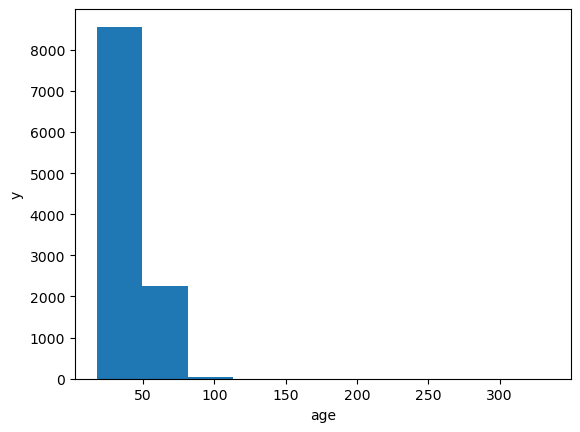

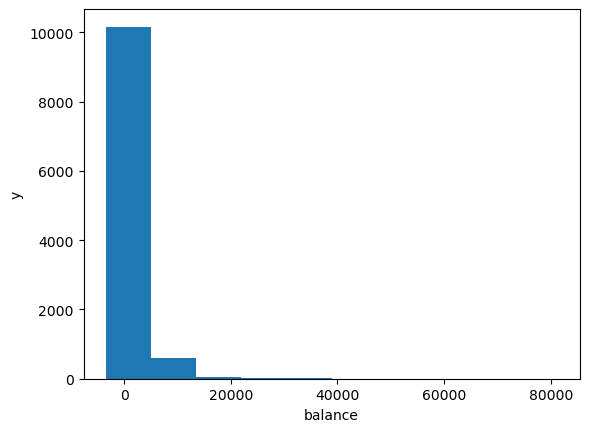

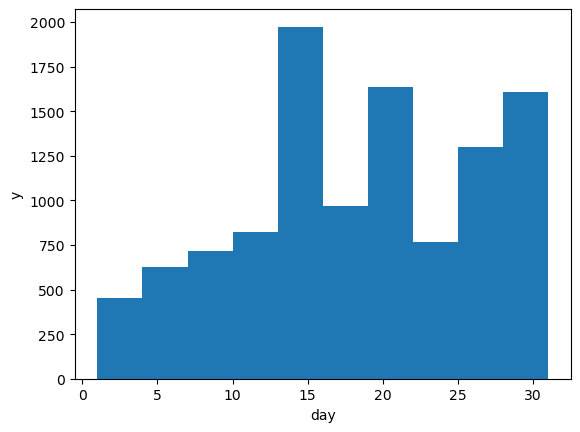

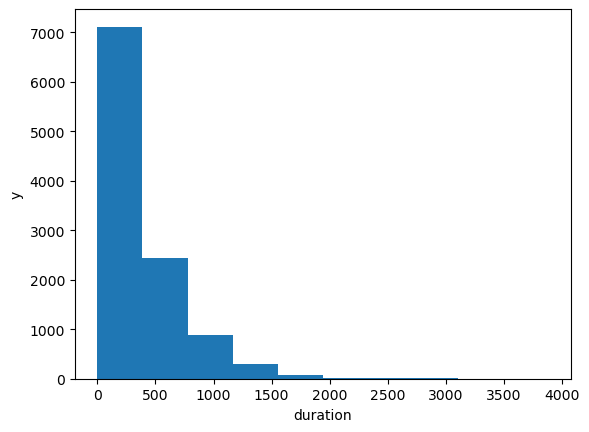

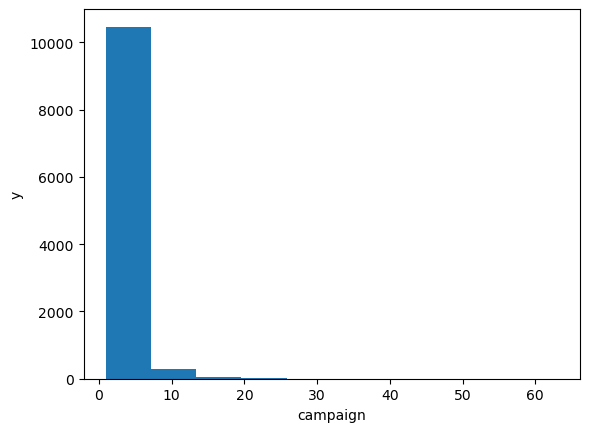

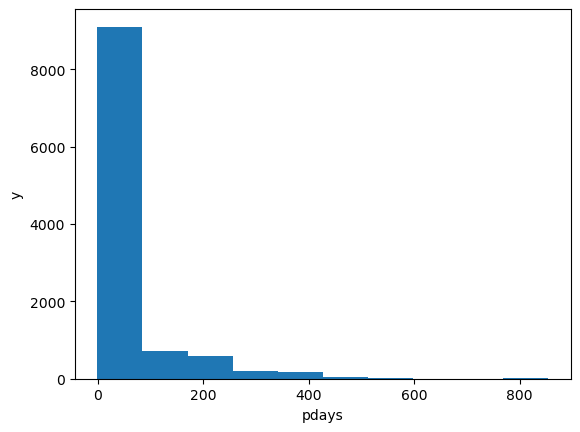

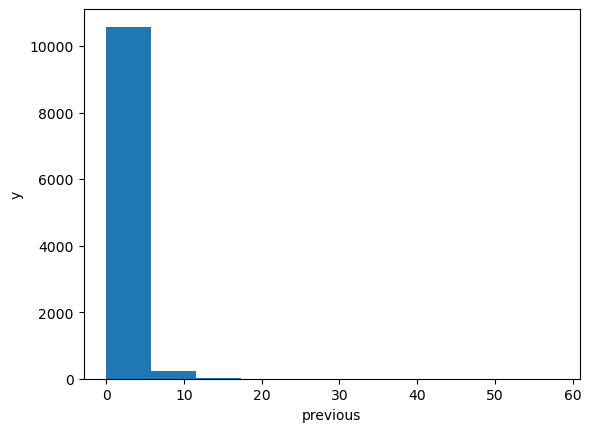

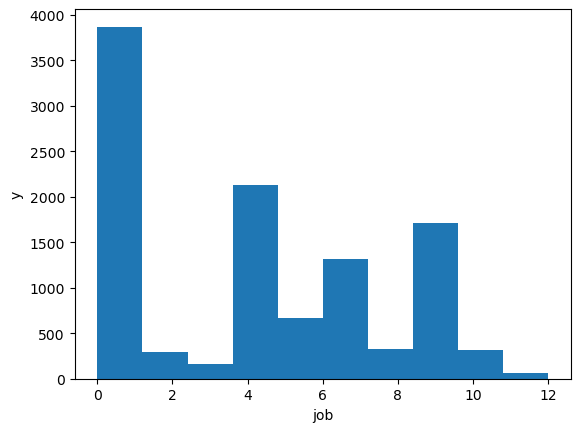

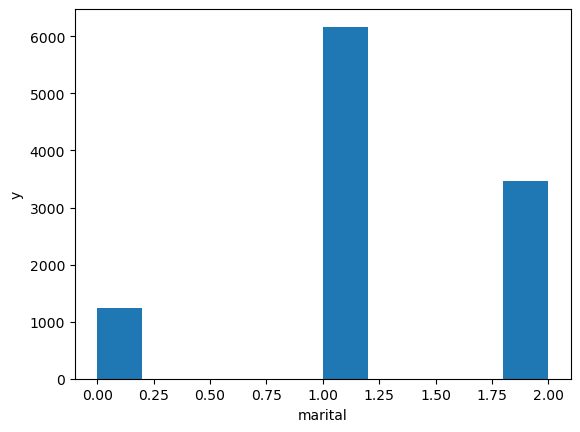

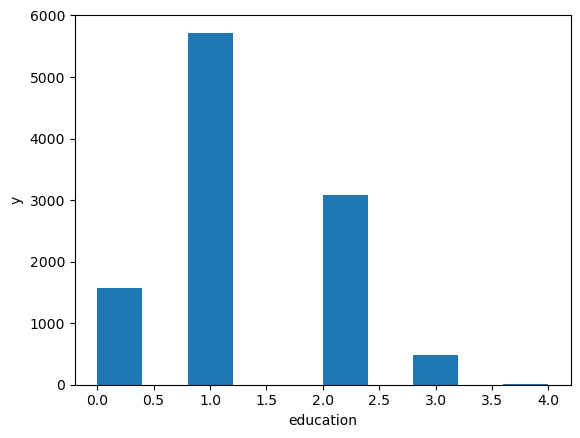

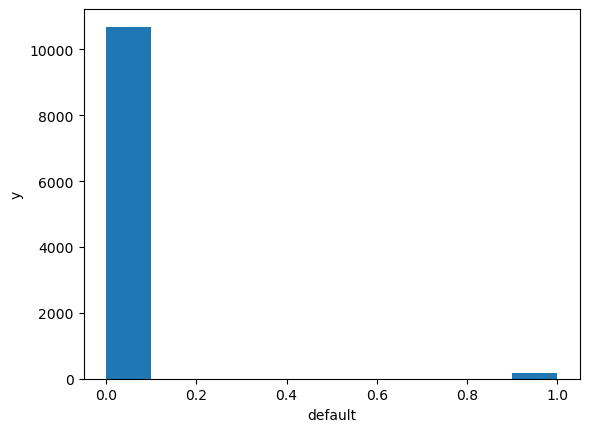

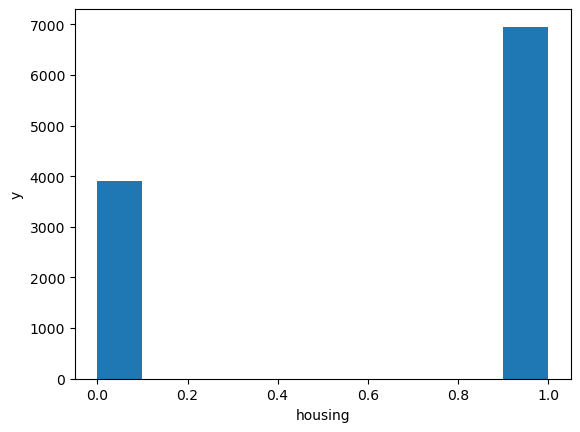

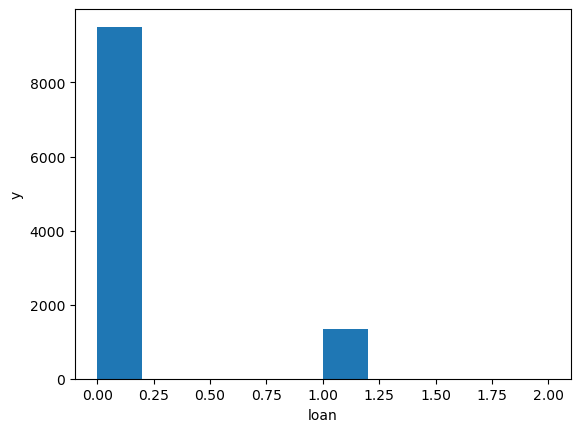

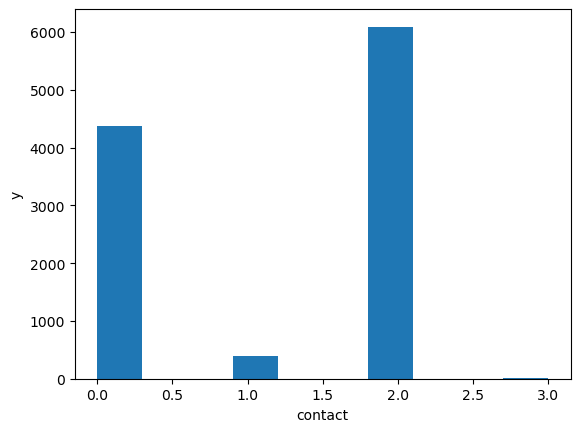

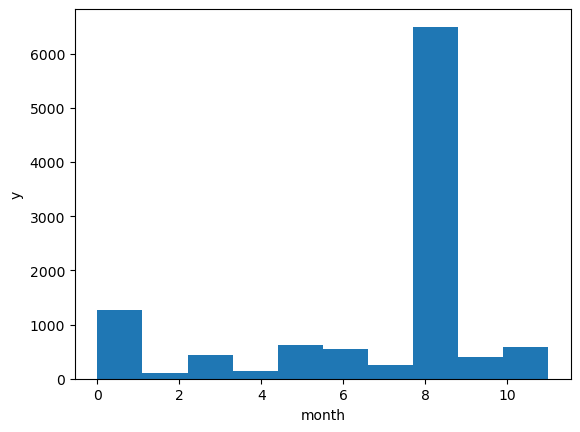

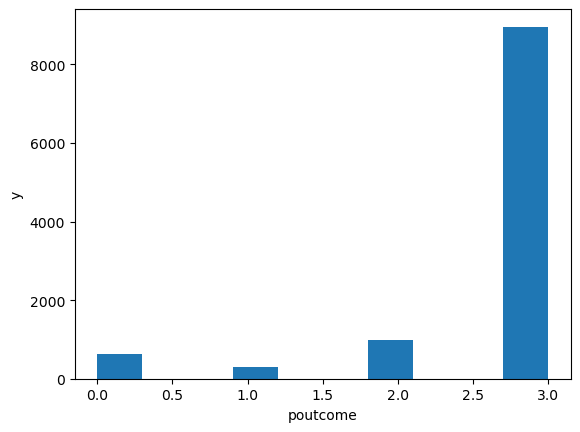

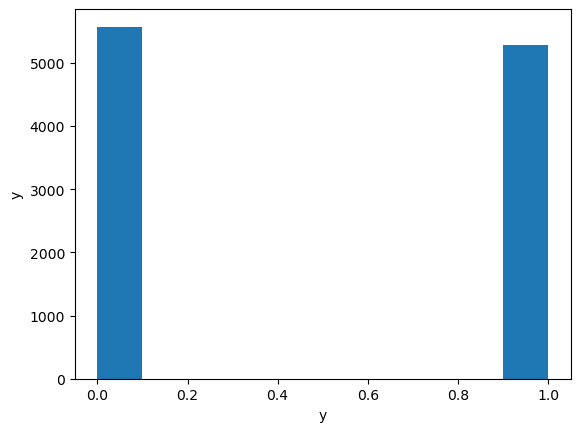

In [113]:
final_df
for col in final_df:
    plt.hist(final_df[col])
    plt.xlabel(col)
    plt.ylabel('y')
    plt.show()

In [114]:
final_df

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,59,2343.0,5.0,1042.0,1,-1.0,0,0,1,1,0,1,0,2,8,3,1
1,56,45.0,5.0,1467.0,1,-1.0,0,0,1,1,0,0,0,2,8,3,1
2,41,1270.0,5.0,1389.0,1,-1.0,0,9,1,1,0,1,0,2,8,3,1
3,55,2476.0,5.0,579.0,1,-1.0,0,7,1,1,0,1,0,2,8,3,1
4,54,184.0,5.0,673.0,2,-1.0,0,0,1,2,0,0,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,45,413.0,30.0,65.0,1,-1.0,0,3,0,0,0,1,0,2,8,3,0
10857,51,4178.0,30.0,556.0,1,-1.0,0,0,1,1,0,1,0,2,8,3,0
10858,40,2147.0,30.0,115.0,1,-1.0,0,4,1,2,0,1,0,2,8,3,0
10859,43,1096.0,30.0,180.0,1,-1.0,0,1,1,1,0,0,1,2,8,3,0


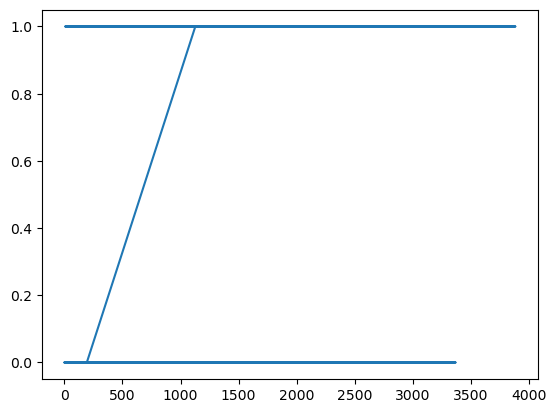

In [115]:
plt.plot(final_df['duration'],y)
plt.show()

In [116]:
y = final_df['y']

In [117]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10856    0
10857    0
10858    0
10859    0
10860    0
Name: y, Length: 10861, dtype: int32

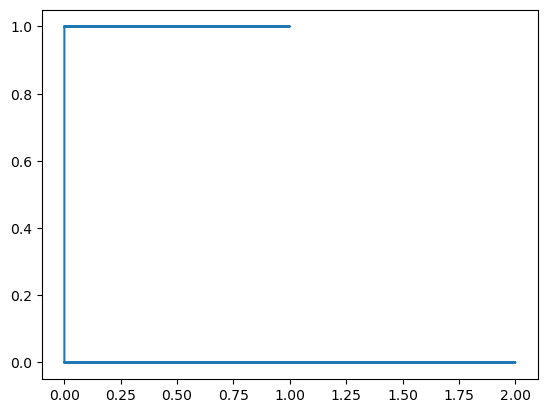

In [118]:
plt.plot(final_df['loan'],y)
plt.show()

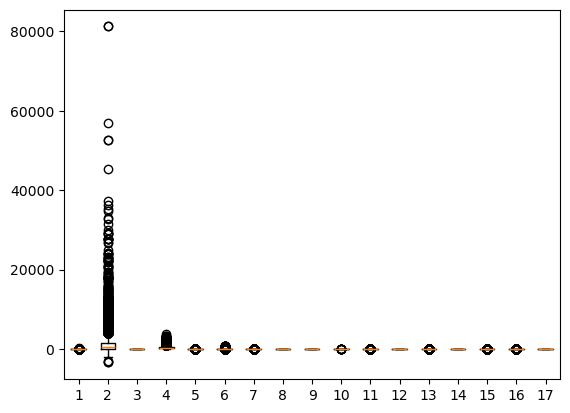

In [119]:
plt.boxplot(final_df)
plt.show()

In [120]:
for cols in num_cols:
    num_df[cols] = (num_df[cols]-num_df[cols].min())/(num_df[cols].max()-num_df[cols].min())

In [121]:
def outlier_removal(num_df,column_name):
    q1 = num_df[column_name].quantile(0.25)
    q3 = num_df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bond = q3+1.5*iqr
    lower_bond = q3-1.5*iqr
    num_df[column_name] = num_df[column_name].clip(upper = upper_bond)
    num_df[column_name] = num_df[column_name].clip(lower = lower_bond)
    return num_df[column_name]

In [122]:
for cols in num_cols:
    final_df[cols] = outlier_removal(final_df,cols)

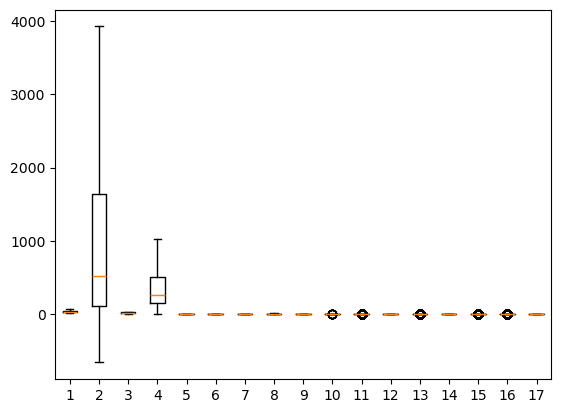

In [123]:
plt.boxplot(final_df)
plt.show()

In [124]:
final_df.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,59.0,2343.0,6.5,1032.0,1,-1.0,0,0,1,1,0,1,0,2,8,3,1
1,56.0,45.0,6.5,1032.0,1,-1.0,0,0,1,1,0,0,0,2,8,3,1
2,41.0,1270.0,6.5,1032.0,1,-1.0,0,9,1,1,0,1,0,2,8,3,1
3,55.0,2476.0,6.5,579.0,1,-1.0,0,7,1,1,0,1,0,2,8,3,1
4,54.0,184.0,6.5,673.0,2,-1.0,0,0,1,2,0,0,0,2,8,3,1


In [125]:
y = final_df["y"]
x = final_df.drop("y",axis = 1)

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [229]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

In [253]:
clas_rep = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("classification_report",clas_rep)
print("accuracy_score",accuracy*100)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(clas_rep)

classification_report               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1119
           1       0.99      0.98      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.99      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173

accuracy_score 98.48136217211228
Accuracy: 0.9848
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1119
           1       0.99      0.98      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.99      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173



In [255]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[1109   10]
 [  23 1031]]


In [257]:
with open("text.pkl", "wb") as file:
    pkl.dump(final_df, file)